In [11]:
import os, sqlalchemy, psycopg2
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use("seaborn")

LOGINFILE = os.path.dirname(os.path.abspath('')) + '/Airflow/plugins/weather_app/cleansed_to_sql/login.txt'
with open(LOGINFILE, 'r') as fh:
    params = eval(fh.read())
host = 'localhost'
password = params["password"]
user = params["user"]
port = 5435
database = params["database"]
engine = sqlalchemy.engine.create_engine(f"""postgresql://{user}:{password}@{host}:{port}/{database}""")
print("Creates an SQLAlchemy-engine, connecting to localhost")


/tmp/ipykernel_7538/3144993220.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Creates an SQLAlchemy-engine, connecting to localhost


In [9]:
mydf = pd.read_sql("select * from city", engine)
print(mydf)

   city_id  index  city_name  longitude  latitude
0        1      0  stockholm   58.90265  17.54946
1        2      1   göteborg   58.90265  17.54946
2        3      2      malmö   58.90265  17.54946
3        4      3       umeå   58.90265  17.54946
4        5      4     Lödöse   58.90265  17.54946
5        6      5      trosa   58.90265  17.54946


In [10]:
main_df = pd.read_sql('weather_data',engine)
print(main_df.head())

   index  city_id                time gust_unit  gust_value hcc_mean_unit  \
0      0        3 2023-01-20 13:00:00      None         3.9          None   
1      1        3 2023-01-20 14:00:00      None         4.7          None   
2      2        3 2023-01-20 15:00:00      None         4.6          None   
3      3        3 2023-01-20 16:00:00      None         2.8          None   
4      4        3 2023-01-20 17:00:00      None         3.5          None   

   hcc_mean_value lcc_mean_unit  lcc_mean_value mcc_mean_unit  ...  tstm_unit  \
0               0          None               7          None  ...       None   
1               0          None               7          None  ...       None   
2               0          None               7          None  ...       None   
3               0          None               7          None  ...       None   
4               0          None               7          None  ...       None   

  tstm_value  vis_unit vis_value  wd_unit wd_value

In [79]:
# Fetching data from the database for Data Visualization by using SQL-statement
lodose_value = pd.read_sql("""
SELECT t_value, time FROM weather_data
WHERE city_id = 1
ORDER BY time ASC
LIMIT 20
""", engine)

goteborg_value = pd.read_sql("""
SELECT t_value, time FROM weather_data
WHERE city_id = 2
ORDER BY time ASC
LIMIT 20;
""", engine)

stockholm_value = pd.read_sql("""
SELECT t_value, time FROM weather_data
WHERE city_id = 3
ORDER BY time ASC
LIMIT 20;
""", engine)

trosa_value = pd.read_sql("""
SELECT t_value, time FROM weather_data
WHERE city_id = 4
ORDER BY time ASC
LIMIT 20
""", engine)

umea_value = pd.read_sql("""
SELECT t_value, time FROM weather_data
WHERE city_id = 5
ORDER BY time ASC
LIMIT 20
""", engine)

malmo_value = pd.read_sql("""
SELECT t_value, time FROM weather_data
WHERE city_id = 6
ORDER BY time ASC
LIMIT 20;
""", engine)

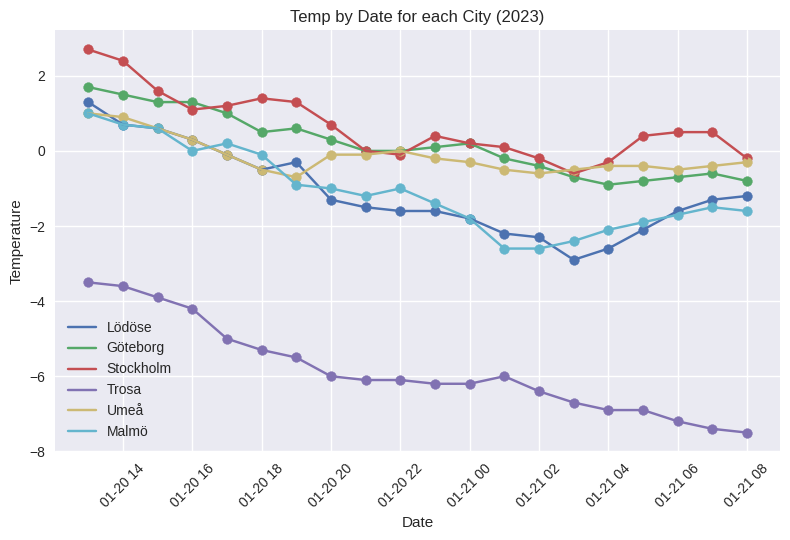

In [80]:
# Plotting some Data
# The purpose is to show that we can fetch data from the database and make something useful & insightful
plt.plot(lodose_value["time"], lodose_value["t_value"], label = "Lödöse")
plt.scatter(lodose_value["time"], lodose_value["t_value"])

plt.plot(goteborg_value["time"], goteborg_value["t_value"], label = "Göteborg")
plt.scatter(goteborg_value["time"], goteborg_value["t_value"])

plt.plot(stockholm_value["time"], stockholm_value["t_value"], label = "Stockholm")
plt.scatter(stockholm_value["time"], stockholm_value["t_value"])

plt.plot(trosa_value["time"], trosa_value["t_value"], label = "Trosa")
plt.scatter(trosa_value["time"], trosa_value["t_value"])

plt.plot(umea_value["time"], umea_value["t_value"], label = "Umeå")
plt.scatter(umea_value["time"], umea_value["t_value"])

plt.plot(malmo_value["time"], malmo_value["t_value"], label = "Malmö")
plt.scatter(malmo_value["time"], malmo_value["t_value"])

plt.title("Temp by Date for each City (2023)")
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Temperature")
plt.tight_layout()
plt.show()

   weather_description  count
0        Moderate rain      6
1        Halfclear sky     11
2     Nearly clear sky      5
3             Overcast     29
4  Variable cloudiness      8
5            Clear sky     17


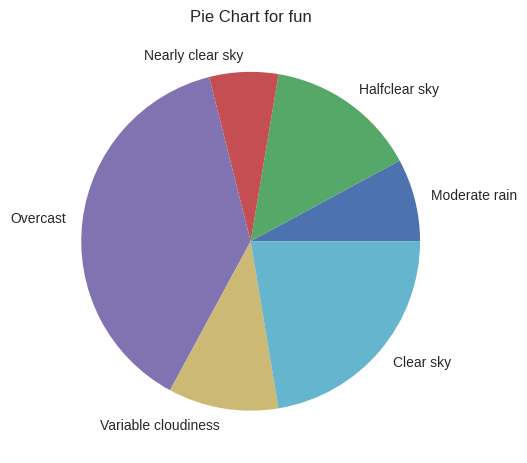

In [81]:
weather_description = pd.read_sql("""
SELECT wdsc.weather_description, count(wdsc.weather_description) FROM weather_data wd
JOIN city on city.city_id = wd.city_id
JOIN weather_description wdsc on wdsc.id = wd.wsymb2_value
where city.city_name in ('göteborg')
group by wdsc.weather_description
having count(wdsc.weather_description)>4;
""", engine)
print(weather_description)

plt.pie(weather_description["count"], labels = weather_description["weather_description"])
plt.title("Pie Chart for fun")
plt.show()



In [12]:
date_df = pd.read_sql("""SELECT * FROM time;""", engine)
normal_df = main_df["time"]

SyntaxError: invalid syntax (3129342470.py, line 1)